# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [60]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import os

if not os.path.exists("lenaRGB.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGB.png --no-check-certificate
if not os.path.exists("lenaRGBSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGBSzum.png --no-check-certificate

lena_szum = cv2.imread('lenaRGBSzum.png')
lena_szum = cv2.cvtColor(lena_szum,cv2.COLOR_BGR2RGB)

lena = cv2.imread('lenaRGB.png')
lena = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Przefiltrowany obraz okno: 3x3')

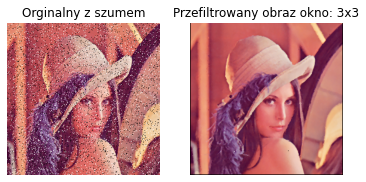

In [62]:
def RGB_median(im,size):
  X,Y,Z = im.shape
  fil_im = np.zeros((X,Y,Z),dtype = np.uint8)
  for j in range(size//2,Y - size//2):
    for i in range(size//2,X - size//2):
      window = im[i-size//2:i+size//2+1,j-size//2:j+size//2+1].astype(float)
      shape = window.shape
      distance = np.zeros((shape[0],shape[1]),dtype = np.float32)
      for colWin in range(shape[1]):
        for rowWin in range(shape[0]):
          distance[rowWin,colWin] = np.sqrt(np.square((window - window[rowWin, colWin])).sum(axis = 2)).sum()
      x,y = np.unravel_index(np.argmin(distance),distance.shape)
      fil_im[i,j] = window[x,y]
  return fil_im



In [68]:
sizes = [3,5,7]

f, axs = plt.subplots(2,4)
f.set_size_inches(40,20)
axs[0,0].imshow(lena)
axs[0,0].axis('off')
axs[0,0].set_title('Orginalny z szumem')

axs[1,0].imshow(lena_szum)
axs[1,0].axis('off')
axs[1,0].set_title('Orginalny z szumem')

for i,size in enumerate(sizes):
  norm_fil = RGB_median(lena,size)
  szum_fil = RGB_median(lena_szum,size)

  axs[0,i+1].imshow(norm_fil)
  axs[0,i+1].axis('off')
  axs[0,i].set_title(f'Przefiltrowany okno:{size}x{size}')

  axs[1,i+1].imshow(szum_fil)
  axs[1,i+1].axis('off')
  axs[1,i+1].set_title(f'Przefiltrowany okno:{size}x{size}')

Output hidden; open in https://colab.research.google.com to view.

Filtracja pozwala się pozbyć szumu, analogicznie jak dla filtracji obrazow w skali szarosci wraz ze wzrostem okna obraz traci na ostrosci i staje sie bardziej rozmytu, mam to miejsce dla obrazu zaszumionego jak również orazu bez szumu